In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.model_selection import cross_val_score
# from lightgbm import LGBMRegressor

In [4]:
x_test = pd.read_csv('data/X_testN=3_alpha=05_h=102J.csv')
y_test = pd.read_csv('data/Y_testN=3_alpha=05_h=102J.csv')
x_train = pd.read_csv('data/X_trainN=3_alpha=05_h=102J.csv')
y_train = pd.read_csv('data/Y_trainN=3_alpha=05_h=102J.csv')


In [5]:
x_test

,theta,phi
0,0.000000,0.000000
1,0.444266,0.000000
2,0.634665,0.000000
3,0.951998,0.000000
4,1.078931,0.000000
...,...,...
2995,5.838920,3.141593
2996,5.965853,3.141593
2997,6.092786,3.141593
2998,6.156252,3.141593


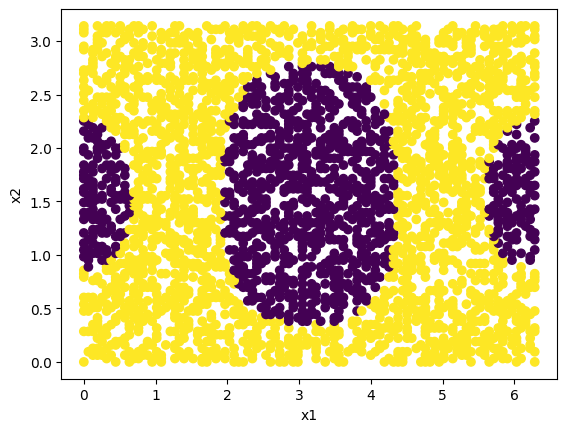

In [6]:
plt.scatter(x_test['theta'],x_test['phi'],c=y_test['DQPT'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


## Descripción de la data

In [7]:
len(x_train)

7000

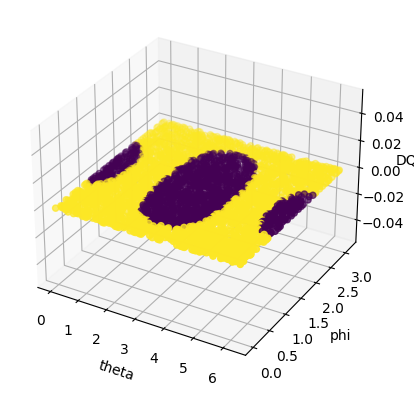

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test['theta'],x_test['phi'],c=y_test['DQPT'])
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('DQPT')
plt.show()


array([[<Axes: title={'center': 'DQPT'}>]], dtype=object)

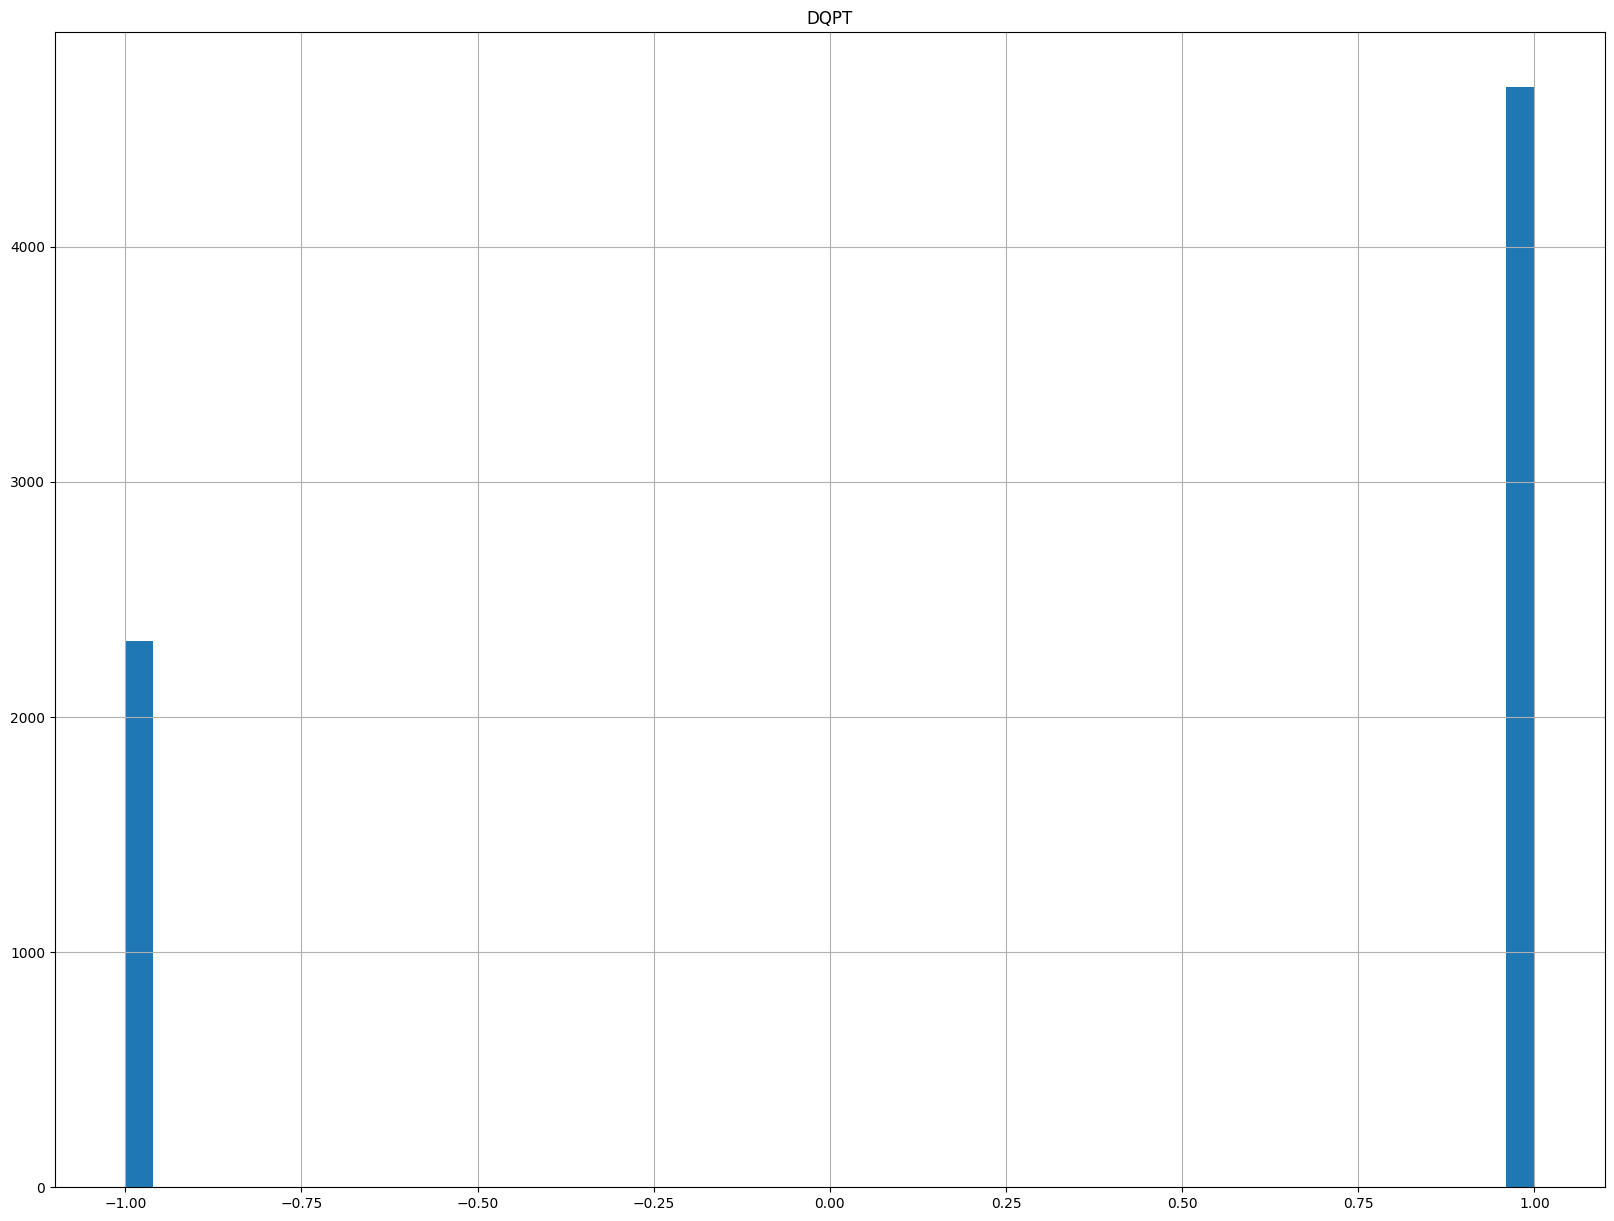

In [9]:
y_train.hist( bins=50, figsize=(20,15))

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'phi'}>]], dtype=object)

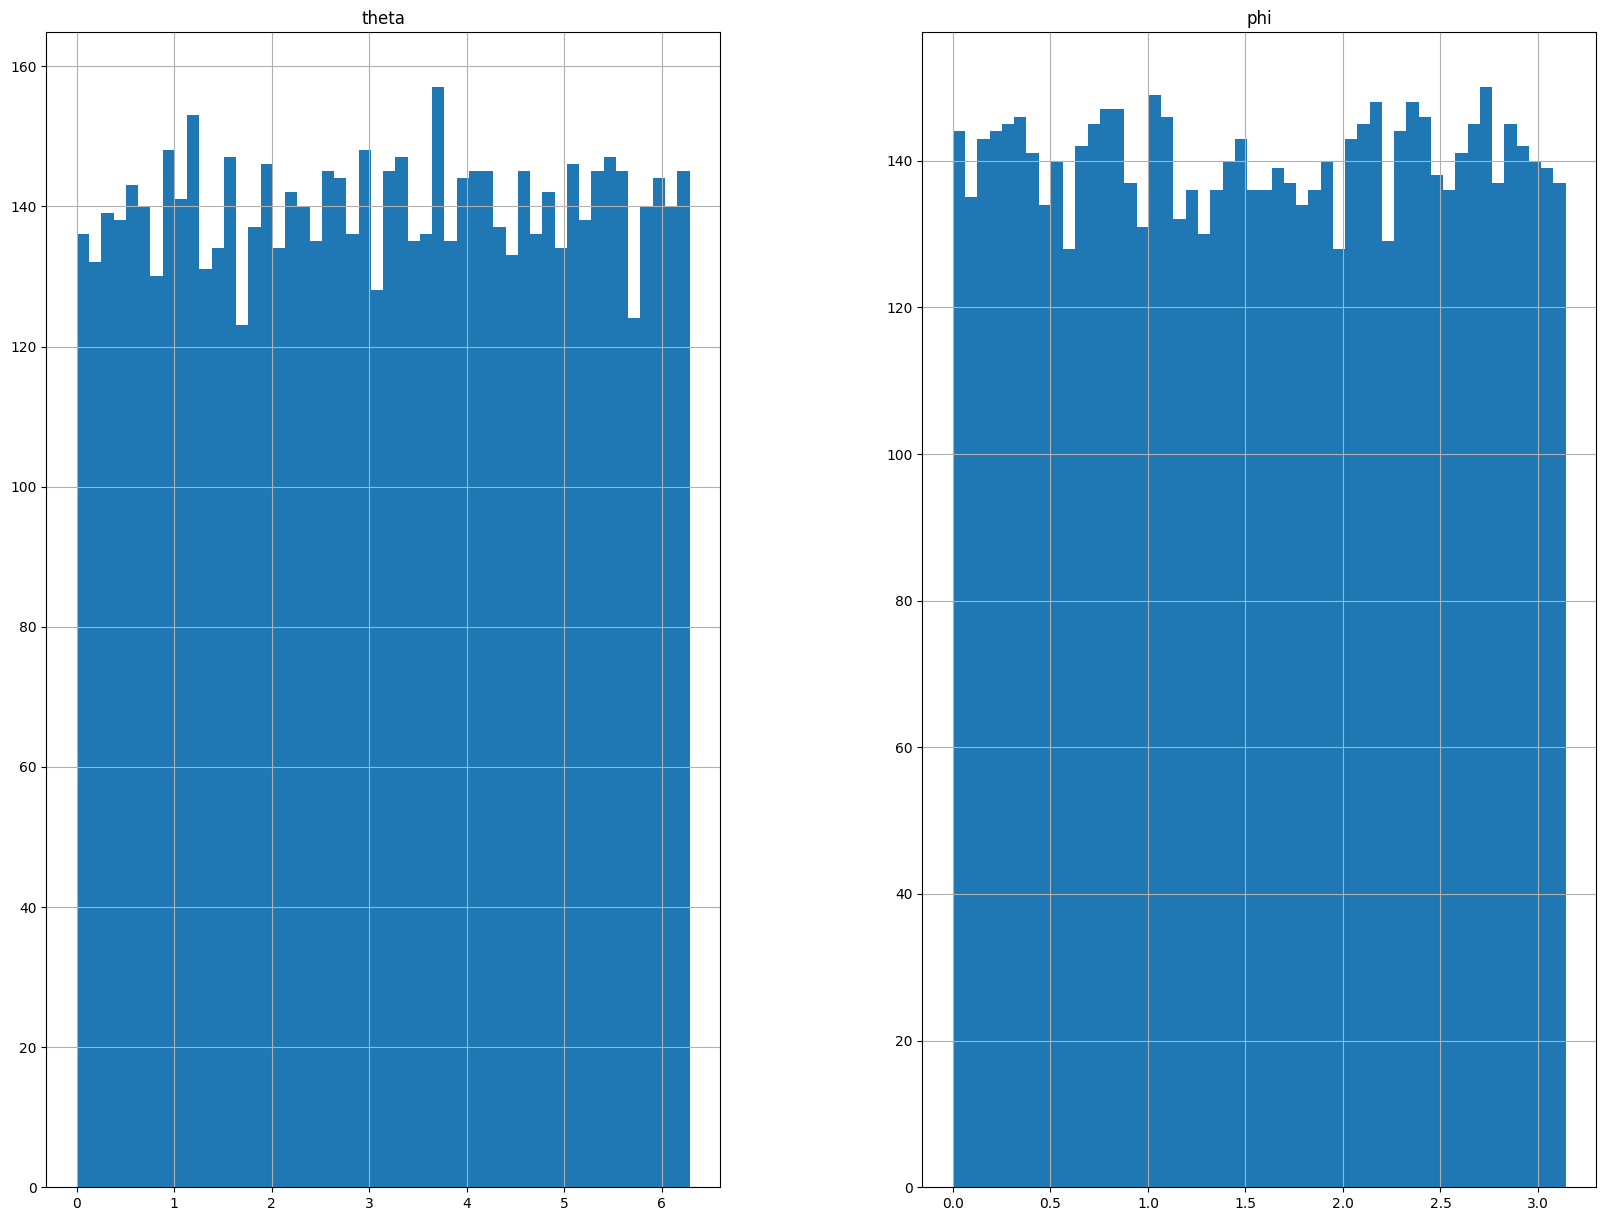

In [10]:
x_train.hist( bins=50, figsize=(20,15))

In [11]:
model = SVC(kernel="rbf", probability=True)
model.fit(x_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# lgbm = LGBMRegressor()
# lgbm.fit(x_train, y_train)

/Users/josefredes/Desktop/SVC/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/b3/97rb_ll92zs13dv5h2p5chxh0000gn/T/ipykernel_51470/87906455.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestClassifier()

In [12]:
rf_prediction = rf_model.predict(x_test)
rfscore = accuracy_score(y_test, rf_prediction)

prediction = model.predict(x_test)
score = accuracy_score(y_test, prediction)

print('% prediction: ', score)
print('% rf_prediction: ', rfscore)

% prediction:  0.9583333333333334
% rf_prediction:  0.99


First pred

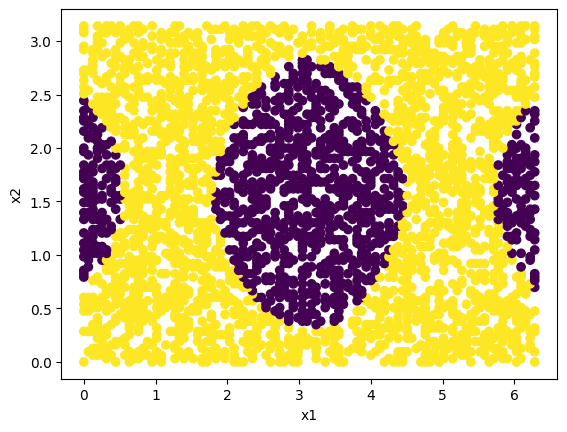

In [48]:
plt.scatter(x_test['theta'],x_test['phi'],c=prediction)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [33]:
points_C = 1000
Cf = 10
score =np.zeros(points_C)
c=np.linspace(1e-3,Cf,points_C)
ypred = 0
for i in range(0,points_C):
    svm = SVC(kernel="rbf", C = c[i]).fit(x_train, y_train)     
    rf = RandomForestClassifier().fit(x_train, y_train) 
    rf_ypred = rf.predict(x_test)
    ypred = svm.predict(x_test)  
    

    score[i] = accuracy_score(y_test, ypred)


index = np.argmax(score)
c_max = c[index]
print('score test max =', score[index])
print('C_max = ', c[index])

/Users/josefredes/Desktop/SVC/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/b3/97rb_ll92zs13dv5h2p5chxh0000gn/T/ipykernel_19565/367172821.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier().fit(x_train, y_train)
/Users/josefredes/Desktop/SVC/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/b3/97rb_ll92zs13dv5h2p5chxh0000gn/T/ipykernel_19565/367172821.py:8: DataConversionWarning: A column-vector y was passed whe

score test max = 0.9773333333333334
C_max =  8.889


Text(0, 0.5, 'Score')

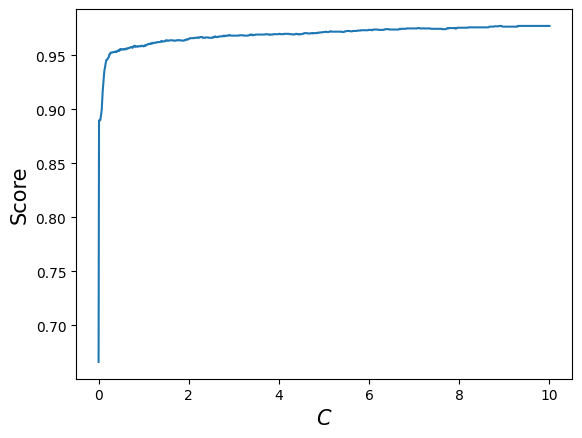

In [34]:
plt.plot(c,score)
plt.xlabel(r'$C$',fontsize = 15)
plt.ylabel(r'Score',fontsize = 15)

In [36]:
ypred

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
precision_score(y_test,ypred, average='weighted')

0.9773145571863008